# Numerical Integration 

##1. Solving Second Order ODE's

### scipy.integrate.ode

## 2. Introduction to Animation

### http://matplotlib.org/1.4.1/examples/animation/


In [1]:
%matplotlib inline
# All imports

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display
from scipy.integrate import ode


from pdb import set_trace
np.set_printoptions(formatter={'float': '{:.5f}'.format})


## 1. Solve Second Order ODE's with scipy.integrate.ode

## scipy.integrate.ode(f, jac=None)

## A generic interface class to numeric integrators.

## Solve an equation system $y′(t)=f(t,y)$

## The spring-mass problem

## $$x''(t) + bx'(t) + cx(t) = 0$$

## where $c = \frac {k} {m}$


## Tranform it into two coupled 1st order ODE, then use scipy.integrate.ode

## Define 

## $$ v(t) = x'(t) \tag{1}$$

## Then 

## $$v'(t) + bv(t) + cx(t) = 0$$

## Or

## $$v'(t) = -bv(t) - cx(t) \tag{2} $$

## Thus here are the coupled equations:
      
      
## $$\begin{cases} 
      x'(t) = v(t) \\
      v'(t) = -bv(t) - cx(t)
\end{cases} \tag {2}$$

## Initial condition:

## $$\begin{cases} 
      v(t = 0) = 0\\
      x(t = 0) = 10
\end{cases} \tag {2}$$


## For coding,

## x --> y[0]
## v --> y[1]

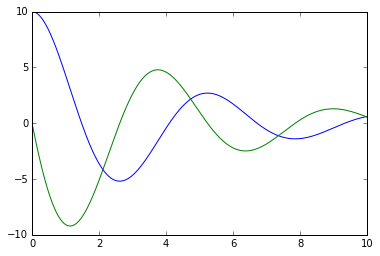

In [3]:
'''

Damped Harmonic Oscillator

(Next time: can include the jacobian information)

'''

from scipy.integrate import ode

y0, t0 = [10., 0.], 0

def f(t, y, b, c):
    return [y[1], -b*y[1]-c*y[0]]

b = 0.5
c = 1.5


r = ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y0, t0).set_f_params(b, c)
t1 = 10.
dt = 0.01
t_arr = np.array([])
x_arr = np.array([])
v_arr = np.array([])

while r.successful() and r.t < t1:
    
    t_arr = np.append(t_arr, r.t)
    x, v = r.integrate(r.t+dt)
    x_arr = np.append(x_arr, x)
    v_arr = np.append(v_arr, v)

plt.plot(t_arr, x_arr)
plt.plot(t_arr, v_arr)
plt.show()
#     print(r.t, r.integrate(r.t+dt))

x_v.shape: (1257, 2)


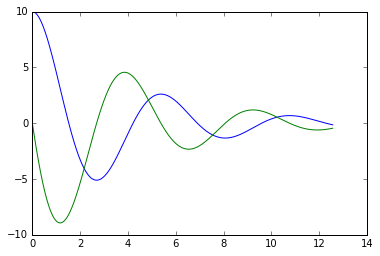

In [4]:
'''
A cleaner interface: odeint

(Next time: can include the jacobian information)

'''
# -----------> new import!! <----------------
from scipy.integrate import odeint

y0, t0 = [10., 0.], 0

def DHO(y, t, b, c):
    '''
    Damped harmonic oscillator
    
    b: drag coeff
    c: k/m
    '''
    x, v = y[0], y[1]
    dxdt, dvdt = v, -b*v - c*x
    return [dxdt, dvdt]


b = 0.5
k = 10.
m = 7.
c = k/m

t1 = np.pi*4
dt = 0.01

t = np.arange(0, t1, dt)

x_v = odeint(DHO, y0, t, args=(b, c))
print('x_v.shape:', x_v.shape)
x = x_v[:, 0]
v = x_v[:, 1]

plt.plot(t, x)
plt.plot(t, v)
plt.show()

## Breakout Exercise: Simple Pendulum

## $$\theta''(t) + b\theta'(t) + c sin(\theta(t)) = 0$$

## Note: there is no appoximation here!  In Gen Phys II, this is written as

## $$\theta''(t) + b\theta'(t) + c \theta(t) = 0$$

## by the small angle approximation.

## But here we will solve the exact equation using a numerical method.



th_o.shape: (1257, 2)


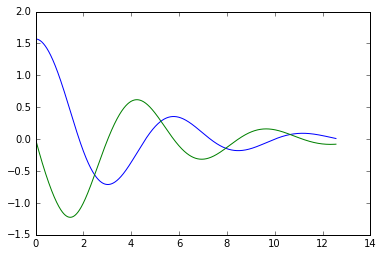

In [9]:
'''
A cleaner interface: odeint

(Next time: can include the jacobian information)

'''
# -----------> new import!! <----------------
from scipy.integrate import odeint

y0, t0 = [np.pi/2., 0.], 0

def HO(y, t, b, c):
    '''
    Harmonic oscillator
    
    b: drag coeff
    c: k/m
    
    x --> Theta
    v --> Omega
    '''
    x, v = y[0], y[1]
    dxdt, dvdt = v, -b*v - c*np.sin(x)
    return [dxdt, dvdt]


b = 0.5
k = 10.
m = 7.
c = k/m

t1 = np.pi*4
dt = 0.01

t = np.arange(0, t1, dt)

th_o = odeint(HO, y0, t, args=(b, c))
print('th_o.shape:', th_o.shape)
th = th_o[:, 0]
o = th_o[:, 1]

plt.plot(t, th)
plt.plot(t, o)
plt.show()

In [11]:
np.cos(1)

0.54030230586813977

# End of Week13-1